### Q3.I and Q3.II

In [10]:
library(ggplot2)
library(reshape2)

In [1]:
#loading datasets
train <- read.csv('assignment1_datasets/Task1B_train.csv')
test <- read.csv('assignment1_datasets/Task1B_test.csv')

In [2]:
#Normalizing
train_scaled <- as.data.frame(scale(train))
test_scaled <- as.data.frame(scale(test))

In [3]:
train.data <- train_scaled[,-5]
train.label <- train_scaled[,5]
test.data <- test_scaled[,-5]
test.label <- test_scaled[,5]

In [4]:
#generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

In [6]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3){
    
    my_data_test <- as.data.frame(test.data)
    my_data_train <- as.data.frame(train.data)

    train.len <- nrow(my_data_train)
    test.len <- nrow(my_data_test)

    colnames(my_data_test) <- c("merged")
    colnames(my_data_train) <- c("merged")
    
    #distance between train and test values in matrix form
    #row = test points, column, train points
    dist <- as.matrix(dist(rbind(my_data_test, my_data_train), method = 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    test_label <- c()
    ## for each test sample...
    for (i in 1:test.len){
        #nn represents the index number of the K(three) smallest values from the train.data set
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        #print(nn)
        ###... and calculate the predicted labels according to the majority vote
        #first loop: nn represents the index of the 3 closest points(taken from train data set)
        #to the first point in the test data frame 
        ##train.label[nn] returns the corresponding the three labels located in nn index
        #lastly we update the test.label[1] with our finding
        test_label[i]<- sum(train.label[nn])/K
    }
    
    ## return the class labels as output
    ## test.label has changed because of KNN update
    return (test_label)
}

In [7]:
#Modifying the code in Activity 2 to handle bootstrapping for KNN regression
K <- 20           # Maximum K for KNN 
L <- 100           # number of datasets
N <- 25          # number of samples in each data set

size <- nrow(test)

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'train'=rep(0,L*K),'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        knn_train <- knn(train.data[indx,], train.label[indx], train.data, K=k)
        knn_test <- knn(train.data[indx,], train.label[indx], test.data, K=k)
        
        #### calculate and record the train and test missclassification rates
        miss[i,'test'] <-  sum((knn_test - test.label)^2)/size
        miss[i,'train'] <-  sum((knn_train - train.label)^2)/size
    }
}

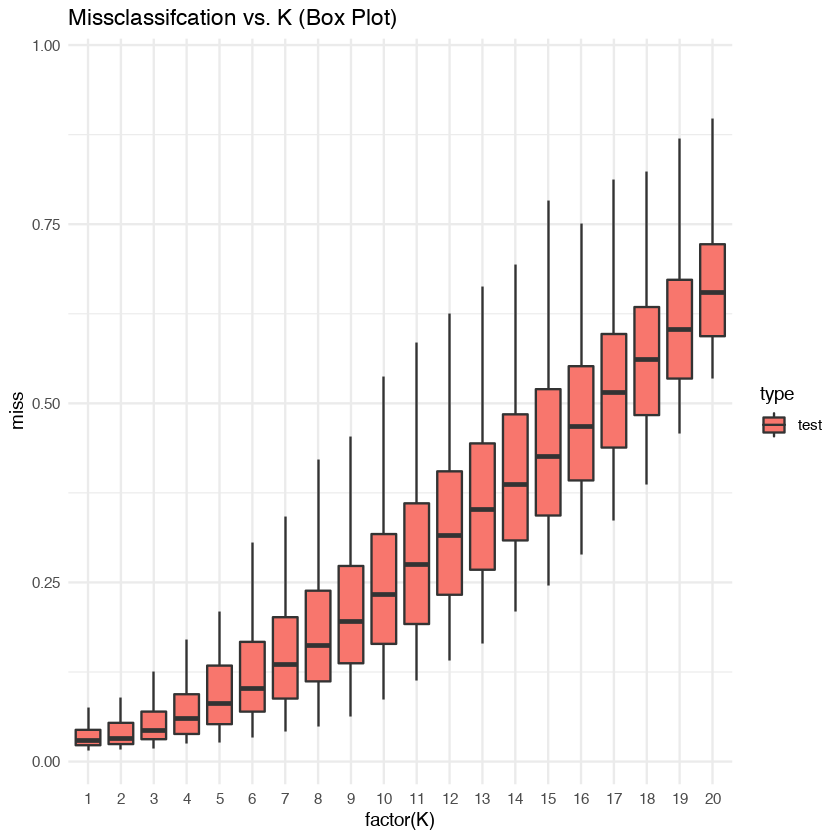

In [11]:
miss.m <- melt(miss, id=c('K', 'L'))
names(miss.m) <- c('K', 'L', 'type', 'miss')
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

### Q3.III

As K increases test error and uncertainty increase as well. This is expected because as previously mentioned, as K increses we overfit the training data which causes high error in the test data.

### Q3.IV

In [12]:
train <- read.csv('assignment1_datasets/Task1B_train.csv')
test <- read.csv('assignment1_datasets/Task1B_test.csv')

In [13]:
#Normalizing
train_scaled <- as.data.frame(scale(train))
test_scaled <- as.data.frame(scale(test))

In [14]:
train.data <- train_scaled[,-5]
train.label <- train_scaled[,5]
test.data <- test_scaled[,-5]
test.label <- test_scaled[,5]

In [15]:
#Modifying the code in Activity 2 to handle bootstrapping for KNN regression
# fix the parameters (50,40,50)
K <- 10           # Maximum K for KNN 
L <- 10           # number of datasets
N <- 25          # size of datasets

# generate bootstrap indices:
times_size <- L*(20)*21*0.5
# a dataframe to track the number of missclassified samples in each case
miss_times <- data.frame('Times'=rep(0,times_size),'L'=rep(0,times_size),'test'=rep(0,times_size))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (t in 1:20){
    L <- t*10
    boot.indx <- boot(nrow(train.data), N, L)
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (t-1)*(L-10)+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        #miss_times[i,'K'] <- k
        miss_times[i,'L'] <- l
        miss_times[i,'Times'] <- L
        
        #knn_train <- knn(train.data[indx,], train.label[indx], train.data, K=k)
        knn_test <- knn(train.data[indx,], train.label[indx], test.data, K=10)
        
        #### calculate and record the train and test missclassification rates
        miss_times[i,'test'] <-  (sum((knn_test - test.label)^2)/size)
        #miss_times[i,'train'] <-  round((sum((knn_train - train.label)^2)/size),2)
    } 
}

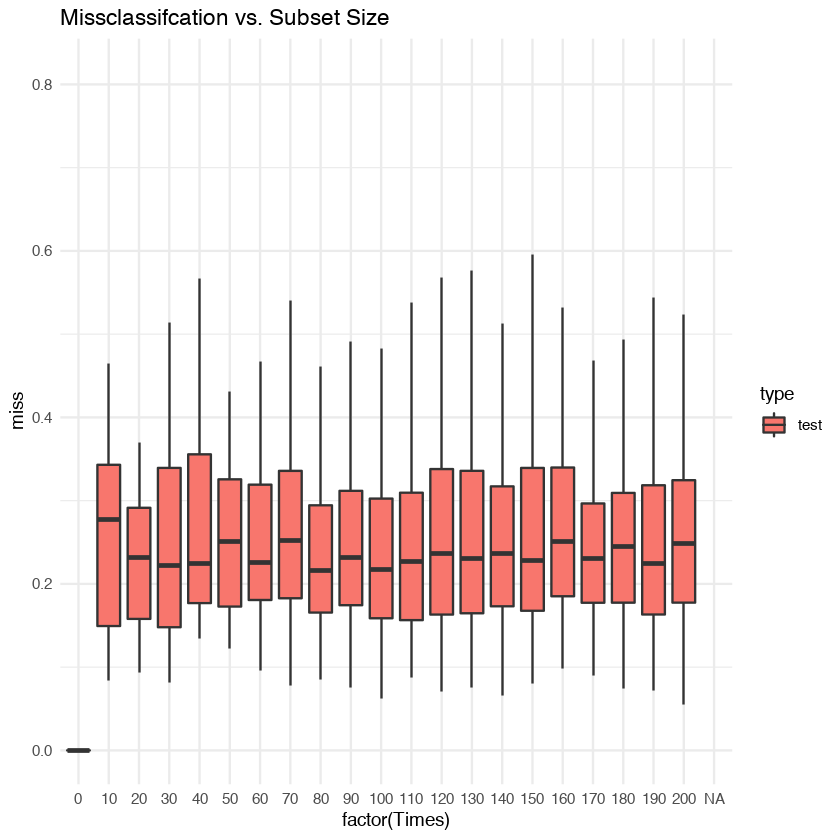

In [17]:
miss.m2 <- melt(miss_times, id=c('Times', 'L'))
names(miss.m2) <- c('Times', 'L', 'type', 'miss')
ggplot(data=miss.m2[miss.m2$type=='test',], aes(factor(Times), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. Subset Size') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

### Q3.V

The graph above shows the test error from different number of datasets obtained from the original dataset using bootstrap method. Each dataset has 25 data points and K=10 is taken for KNN model. The uncertainty does not depend on the amount of datasets taken from the original dataset. We can see we model 200 datasets at the end, and the uncertainty is very similar to the one that modeled 10 datasets in the beginning.